## Installing PyTorch Environment

In [11]:
%pip install torch torchvision torchaudio
%pip install pandas
%pip install scikit-learn
%pip install xlrd
%pip install matplotlib
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


🔵 Training normal model (300 epochs)...
🔴 Training overfit model (1000 epochs)...


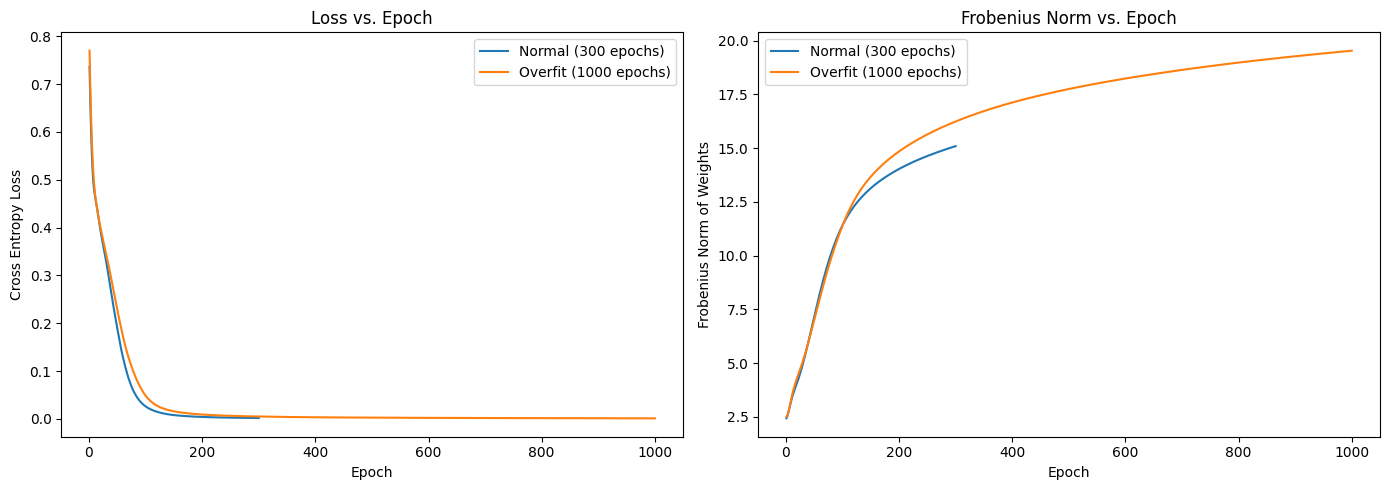

In [ ]:
column_names = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
    'Savings', 'Employment', 'InstallmentRate', 'PersonalStatusSex',
    'OtherDebtors', 'ResidenceDuration', 'Property', 'Age', 'OtherInstallmentPlans',
    'Housing', 'ExistingCredits', 'Job', 'NumLiablePeople', 'Telephone', 'ForeignWorker',
    'Target'
]
df = pd.read_csv('german.data', sep=' ', names=column_names)
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols)
df['Target'] = df['Target'] - 1
X = df.drop(columns='Target').values
y = df['Target'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def to_tensor(X, y):
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

X_train_tensor, y_train_tensor = to_tensor(X_train, y_train)
X_test_tensor, y_test_tensor = to_tensor(X_test, y_test)

class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size=16, output_size=2):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

def compute_frobenius_norm(model):
    weights = [param for name, param in model.named_parameters() if 'weight' in name]
    all_weights = torch.cat([w.flatten() for w in weights])
    return torch.norm(all_weights, p=2).item()

def train_model(model, X_train, y_train, epochs=300, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses, frob_norms = [], []

    for epoch in range(epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        frob_norms.append(compute_frobenius_norm(model))

    return model, losses, frob_norms

input_size = X_train.shape[1]

print("🔵 Training normal model (300 epochs)...")
model_normal = TwoLayerNN(input_size)
model_normal, normal_losses, normal_frobs = train_model(model_normal, X_train_tensor, y_train_tensor, epochs=300)

print("🔴 Training overfit model (1000 epochs)...")
model_overfit = TwoLayerNN(input_size)
model_overfit, overfit_losses, overfit_frobs = train_model(model_overfit, X_train_tensor, y_train_tensor, epochs=1000)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 301), normal_losses, label="Normal (300 epochs)")
plt.plot(range(1, 1001), overfit_losses, label="Overfit (1000 epochs)")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 301), normal_frobs, label="Normal (300 epochs)")
plt.plot(range(1, 1001), overfit_frobs, label="Overfit (1000 epochs)")
plt.title("Frobenius Norm vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Frobenius Norm of Weights")
plt.legend()

plt.tight_layout()
plt.show()


🔵 Training normal model (300 epochs)...
🔴 Training overfit model (1000 epochs)...


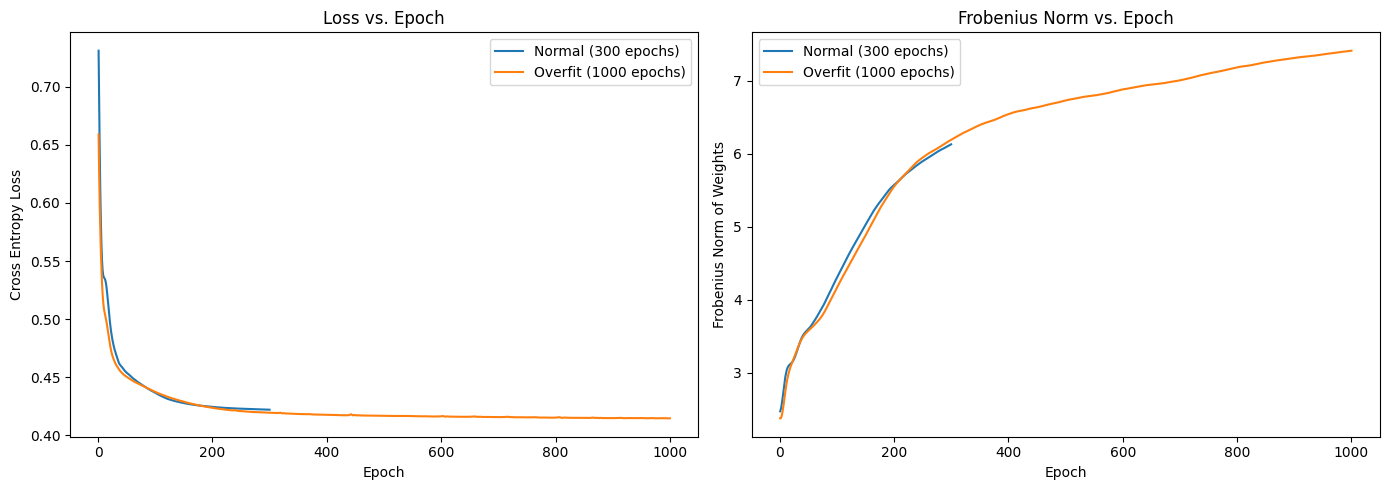

In [ ]:
df = pd.read_excel('default of credit card clients.xls', header=1)
df = df.drop(columns='ID')
df.rename(columns={'default payment next month': 'default'}, inplace=True)
X = df.drop(columns='default').values
y = df['default'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def to_tensor(X, y):
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

X_train_tensor, y_train_tensor = to_tensor(X_train, y_train)
X_test_tensor, y_test_tensor = to_tensor(X_test, y_test)

class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size=16, output_size=2):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

def compute_frobenius_norm(model):
    weights = [param for name, param in model.named_parameters() if 'weight' in name]
    all_weights = torch.cat([w.flatten() for w in weights])
    return torch.norm(all_weights, p=2).item()

def train_model(model, X_train, y_train, epochs=300, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses, frob_norms = [], []

    for epoch in range(epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        frob_norms.append(compute_frobenius_norm(model))

    return model, losses, frob_norms

input_size = X_train.shape[1]

print("Training normal model (300 epochs)...")
model_normal = TwoLayerNN(input_size)
model_normal, normal_losses, normal_frobs = train_model(model_normal, X_train_tensor, y_train_tensor, epochs=300)

print("Training overfit model (1000 epochs)...")
model_overfit = TwoLayerNN(input_size)
model_overfit, overfit_losses, overfit_frobs = train_model(model_overfit, X_train_tensor, y_train_tensor, epochs=1000)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 301), normal_losses, label="Normal (300 epochs)")
plt.plot(range(1, 1001), overfit_losses, label="Overfit (1000 epochs)")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 301), normal_frobs, label="Normal (300 epochs)")
plt.plot(range(1, 1001), overfit_frobs, label="Overfit (1000 epochs)")
plt.title("Frobenius Norm vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Frobenius Norm of Weights")
plt.legend()

plt.tight_layout()
plt.show()


🔵 Training model for 300 epochs...
Epoch 200, Loss: 0.2967

🔴 Training model for 1000 epochs...
Epoch 200, Loss: 0.2983
Epoch 400, Loss: 0.2922
Epoch 600, Loss: 0.2897
Epoch 800, Loss: 0.2882
Epoch 1000, Loss: 0.2873


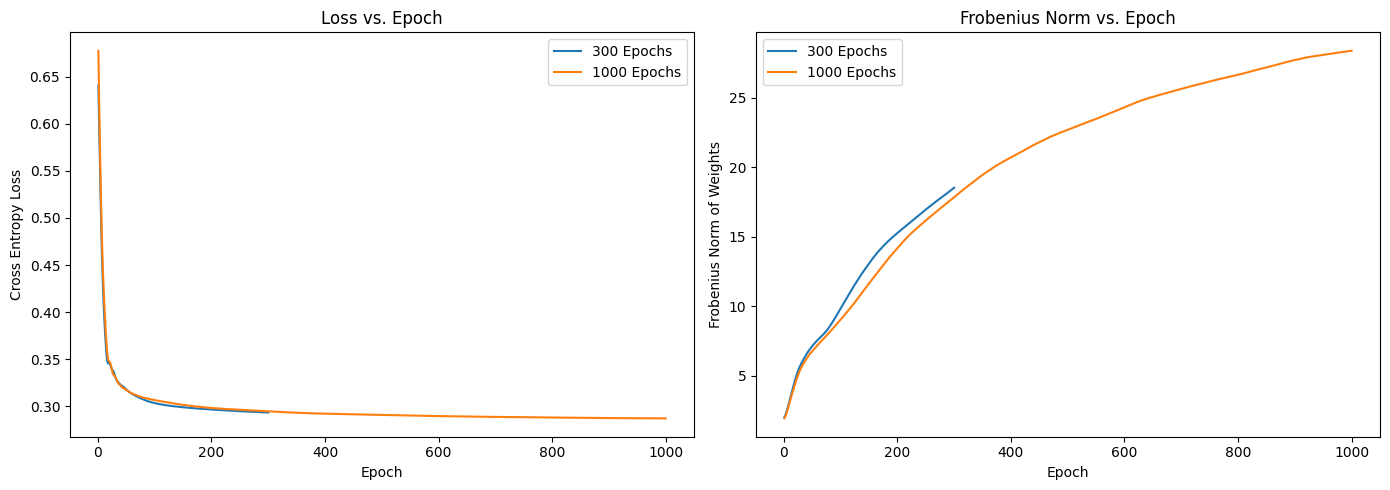

In [ ]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                 names=column_names, na_values=" ?", skipinitialspace=True)
df.dropna(inplace=True)
X = df.drop("income", axis=1)
y = (df["income"] == ">50K").astype(int)

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ])
X_processed = preprocessor.fit_transform(X)

X_tensor = torch.tensor(X_processed.toarray(), dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long)

class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size=10, output_size=2):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

def compute_frobenius_norm(model):
    weights = [param for name, param in model.named_parameters() if "weight" in name]
    all_weights = torch.cat([w.flatten() for w in weights])
    return torch.norm(all_weights, p=2).item()

def train_model(model, X_train, y_train, epochs=1000, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses, frob_norms = [], []
    for epoch in range(epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        frob_norms.append(compute_frobenius_norm(model))
        if (epoch + 1) % 200 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
    return model, losses, frob_norms

torch.manual_seed(42)
input_size = X_tensor.shape[1]

print("🔵 Training model for 300 epochs...")
model_300 = TwoLayerNN(input_size)
model_300, losses_300, frobs_300 = train_model(model_300, X_tensor, y_tensor, epochs=300)

print("\n🔴 Training model for 1000 epochs...")
model_1000 = TwoLayerNN(input_size)
model_1000, losses_1000, frobs_1000 = train_model(model_1000, X_tensor, y_tensor, epochs=1000)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 301), losses_300, label="300 Epochs")
plt.plot(range(1, 1001), losses_1000, label="1000 Epochs")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 301), frobs_300, label="300 Epochs")
plt.plot(range(1, 1001), frobs_1000, label="1000 Epochs")
plt.title("Frobenius Norm vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Frobenius Norm of Weights")
plt.legend()

plt.tight_layout()
plt.show()
